# CSCI443 Lecture 14 Notes


In [104]:
import sys
print(f"Python kernel version: {sys.version}")

Python kernel version: 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]


# Significance Testing
draw an interval with $\bar{x}-\bar{y}$ near zero with a confidence interval on the difference that overlaps zero and the case when the confidence interval does NOT overlap zero

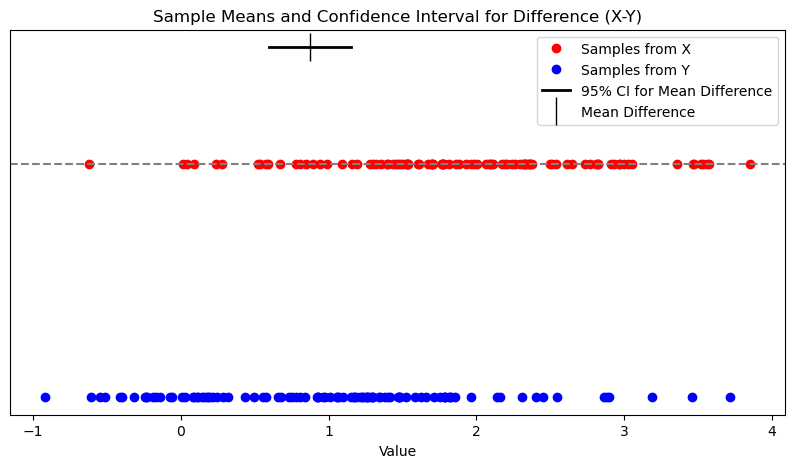

In [154]:
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

def plot_difference_confidence_interval(X, Y):
    """
    Plots the sample mean difference between two arrays X and Y along with the confidence interval
    for the mean difference and dots for each sample from X and Y.
    
    Args:
    X (np.array): Samples from the random variable X.
    Y (np.array): Samples from the random variable Y.
    """
    
    # Calculate differences
    differences = X - Y
    
    # Calculate sample statistics
    diff_mean = np.mean(differences)
    diff_std = np.std(differences, ddof=1) # Sample standard deviation
    n = len(differences)
    
    # Calculate the standard error
    SE = diff_std / np.sqrt(n)
    
    # Degrees of freedom
    df = n - 1
    
    # Critical t-value for 95% CI
    t_critical = t.ppf(0.975, df)
    
    # Confidence interval
    CI_lower = diff_mean - t_critical * SE
    CI_upper = diff_mean + t_critical * SE
    
    # Plotting
    plt.figure(figsize=(10, 5))
    
    # Plot each sample point from X and Y
    plt.plot(X, np.zeros_like(X), 'ro', label='Samples from X')
    plt.plot(Y, np.zeros_like(Y) - 0.02, 'bo', label='Samples from Y') # Offset Y dots for clarity
    
    # Plot mean difference line and confidence interval
    plt.plot([CI_lower, CI_upper], [0.01, 0.01], 'k-', lw=2, label='95% CI for Mean Difference')
    plt.plot(diff_mean, 0.01, 'k|', ms=20, label='Mean Difference')
    
    # Enhance plot
    plt.axhline(y=0, color='grey', linestyle='--') # Reference line at y=0
    plt.legend()
    plt.title('Sample Means and Confidence Interval for Difference (X-Y)')
    plt.xlabel('Value')
    plt.yticks([]) # Hide y-axis ticks
    
    plt.show()

# Example usage
np.random.seed(42) # For reproducible results
X = np.random.normal(2, 1, 100) # Samples from X
Y = np.random.normal(1, 1, 100) # Samples from Y

plot_difference_confidence_interval(X, Y)
